# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

weather_api_key = "4709ddb213b606d4a434549208c4d7cb"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

weather_api_key

'4709ddb213b606d4a434549208c4d7cb'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city= 'cape town'
url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = f"{url}q={city}&appid={weather_api_key}"

response = requests.get(query_url).json()
response

{'coord': {'lon': 18.42, 'lat': -33.93},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 296.19,
  'feels_like': 289.56,
  'temp_min': 294.82,
  'temp_max': 297.15,
  'pressure': 1014,
  'humidity': 57},
 'visibility': 10000,
 'wind': {'speed': 11.3, 'deg': 180},
 'clouds': {'all': 0},
 'dt': 1608214165,
 'sys': {'type': 1,
  'id': 1899,
  'country': 'ZA',
  'sunrise': 1608175827,
  'sunset': 1608227687},
 'timezone': 7200,
 'id': 3369157,
 'name': 'Cape Town',
 'cod': 200}

In [4]:
City_name = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

for city in cities:
    try:
        query_url = f"{url}q={city}&appid={weather_api_key}"
        response = requests.get(query_url).json()
        City_name.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        print('Processing Records for '+str(city))
    except KeyError:
        print('Missing key for this city')

Processing Records for ust-tsilma
Processing Records for bilma
Processing Records for abu dhabi
Processing Records for beidao
Processing Records for tibati
Processing Records for san cristobal
Processing Records for lagoa
Processing Records for kodiak
Processing Records for shieli
Processing Records for itaberai
Processing Records for hobart
Processing Records for naze
Missing key for this city
Processing Records for dikson
Processing Records for busselton
Processing Records for tuatapere
Processing Records for vaini
Processing Records for boyolangu
Processing Records for farmington
Processing Records for bara
Processing Records for hithadhoo
Processing Records for avarua
Missing key for this city
Processing Records for atuona
Processing Records for liberal
Processing Records for lao cai
Processing Records for namikupa
Missing key for this city
Processing Records for punta arenas
Processing Records for torbay
Processing Records for kiama
Processing Records for longyearbyen
Processing R

Processing Records for colares
Processing Records for port hardy
Processing Records for torrijos
Processing Records for zwedru
Processing Records for east london
Processing Records for talnakh
Processing Records for howard springs
Processing Records for vardo
Processing Records for san ignacio
Processing Records for bukama
Processing Records for narsaq
Processing Records for nybro
Processing Records for zhigansk
Missing key for this city
Processing Records for vlad tepes
Processing Records for junagarh
Processing Records for itoman
Processing Records for sisophon
Processing Records for pervomayskiy
Processing Records for astana
Processing Records for tuktoyaktuk
Processing Records for nemuro
Processing Records for ati
Processing Records for rawson
Missing key for this city
Missing key for this city
Processing Records for alto araguaia
Processing Records for kununurra
Processing Records for vila velha
Processing Records for roebourne
Processing Records for kamina
Missing key for this ci

Processing Records for solano
Processing Records for mount gambier
Processing Records for chenghai
Processing Records for egvekinot
Processing Records for gat
Processing Records for hay river
Processing Records for ruidoso
Processing Records for arlit
Processing Records for santa cruz de la palma
Processing Records for andenes
Processing Records for thunder bay
Processing Records for iaciara
Processing Records for labuhan
Processing Records for kangasala
Processing Records for pinega
Processing Records for pueblo
Processing Records for antofagasta
Processing Records for lagos
Processing Records for husavik
Processing Records for kutum
Processing Records for paamiut
Processing Records for launceston
Processing Records for kismayo
Processing Records for manicore
Processing Records for paracatu
Processing Records for tambopata
Processing Records for okato
Processing Records for vyazemskiy
Processing Records for marzuq
Processing Records for dabat
Missing key for this city
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {"City": City_name,
               "Lat": Lat,
               'Lng': Lng,
               'Max Temp': Max_Temp,
               'Humidity': Humidity,
               'Cloudiness': Cloudiness,
               'Wind Speed': Wind_Speed,
               'Country': Country,
               'Date': Date}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ust-Tsilma,65.44,52.15,259.04,93,0,1.51,RU,1608214520
1,Bilma,18.69,12.92,300.97,15,0,4.05,NE,1608214520
2,Abu Dhabi,24.47,54.37,298.15,44,0,3.60,AE,1608214501
3,Beidao,34.57,105.89,266.48,76,100,0.45,CN,1608214520
4,Tibati,6.47,12.63,310.06,10,1,1.94,CM,1608214520


In [6]:
compression_opts = dict(method='zip',archive_name='out.csv')
weather_data.to_csv('Weather.zip', index=False,compression=compression_opts)  

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_dry = weather_data[weather_data.Humidity != 100]

In [9]:
weather_dry


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ust-Tsilma,65.44,52.15,259.04,93,0,1.51,RU,1608214520
1,Bilma,18.69,12.92,300.97,15,0,4.05,NE,1608214520
2,Abu Dhabi,24.47,54.37,298.15,44,0,3.60,AE,1608214501
3,Beidao,34.57,105.89,266.48,76,100,0.45,CN,1608214520
4,Tibati,6.47,12.63,310.06,10,1,1.94,CM,1608214520
...,...,...,...,...,...,...,...,...,...
564,Chicama,-7.84,-79.15,292.15,88,44,4.10,PE,1608214582
565,Pitimbu,-7.47,-34.81,303.15,66,75,5.10,BR,1608214533
566,Tallahassee,30.44,-84.28,281.15,81,90,3.60,US,1608214450
568,Jieshi,22.81,115.83,287.59,71,1,0.89,CN,1608214582


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

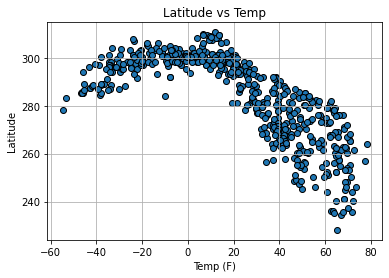

In [33]:
plt.scatter(weather_dry['Lat'], weather_dry['Max Temp'], edgecolors='black')
plt.xlabel('Temp (F)')
plt.ylabel('Latitude')
plt.title('Latitude vs Temp')
plt.grid()

## Latitude vs. Humidity Plot

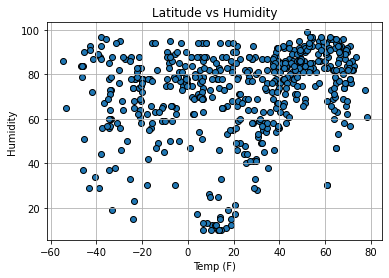

In [34]:
plt.scatter(weather_dry['Lat'], weather_dry['Humidity'], edgecolors='black')
plt.xlabel('Temp (F)')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')
plt.grid()

## Latitude vs. Cloudiness Plot

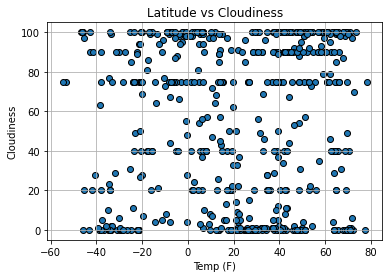

In [35]:
plt.scatter(weather_dry['Lat'], weather_dry['Cloudiness'], edgecolors='black')
plt.xlabel('Temp (F)')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
plt.grid()

## Latitude vs. Wind Speed Plot

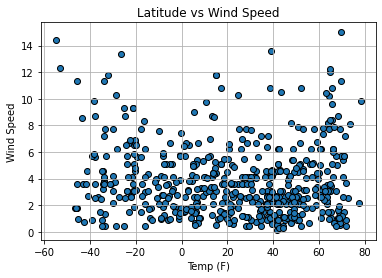

In [36]:
plt.scatter(weather_dry['Lat'], weather_dry['Wind Speed'], edgecolors='black')
plt.xlabel('Temp (F)')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
plt.grid()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6461588043752089
y = 0.28x + 303.43


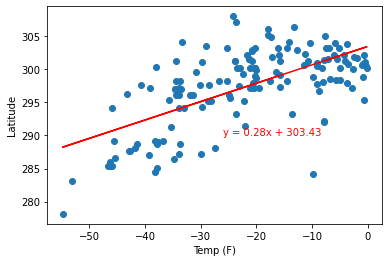

In [37]:
weather_dry_north = weather_dry[weather_dry.Lat <= 0]
x_values = weather_dry_north['Lat']
y_values = weather_dry_north['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print('The r-value is: '+str(rvalue))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-26,290),fontsize=10,color="red")
plt.xlabel('Temp (F)')
plt.ylabel('Latitude')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8374838977812656
y = -0.74x + 306.86


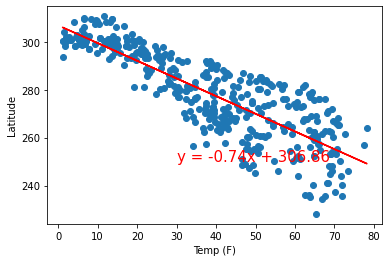

In [38]:
weather_dry_south = weather_dry[weather_dry.Lat >= 0]
x_values = weather_dry_south['Lat']
y_values = weather_dry_south['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print('The r-value is: '+str(rvalue))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,250),fontsize=15,color="red")
plt.xlabel('Temp (F)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.09568210650881784
y = 0.12x + 73.42


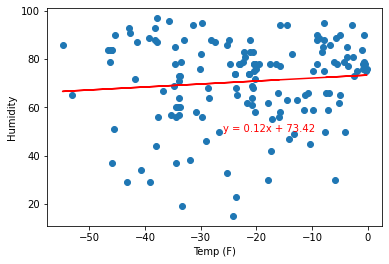

In [39]:
weather_dry_north = weather_dry[weather_dry.Lat <= 0]
x_values = weather_dry_north['Lat']
y_values = weather_dry_north['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print('The r-value is: '+str(rvalue))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-26,50),fontsize=10,color="red")
plt.xlabel('Temp (F)')
plt.ylabel('Humidity')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3767870607835737
y = 0.37x + 58.9


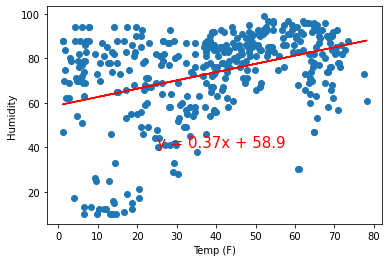

In [40]:
weather_dry_south = weather_dry[weather_dry.Lat >= 0]
x_values = weather_dry_south['Lat']
y_values = weather_dry_south['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print('The r-value is: '+str(rvalue))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,40),fontsize=15,color="red")
plt.xlabel('Temp (F)')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.293775008374438
y = 0.84x + 75.47


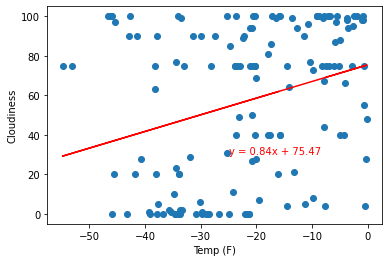

In [41]:
weather_dry_north = weather_dry[weather_dry.Lat <= 0]
x_values = weather_dry_north['Lat']
y_values = weather_dry_north['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print('The r-value is: '+str(rvalue))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,30),fontsize=10,color="red")
plt.xlabel('Temp (F)')
plt.ylabel('Cloudiness')
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11850955334971094
y = 0.23x + 45.07


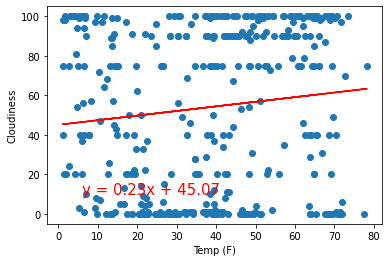

In [42]:
weather_dry_south = weather_dry[weather_dry.Lat >= 0]
x_values = weather_dry_south['Lat']
y_values = weather_dry_south['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print('The r-value is: '+str(rvalue))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temp (F)')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.21239334903457407
y = -0.04x + 3.29


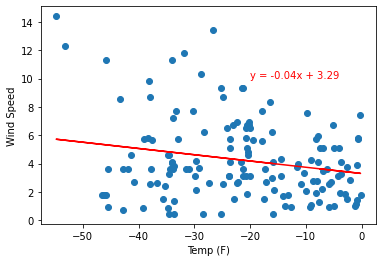

In [43]:
weather_dry_north = weather_dry[weather_dry.Lat <= 0]
x_values = weather_dry_north['Lat']
y_values = weather_dry_north['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print('The r-value is: '+str(rvalue))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=10,color="red")
plt.xlabel('Temp (F)')
plt.ylabel('Wind Speed')
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09393171761853648
y = 0.01x + 3.18


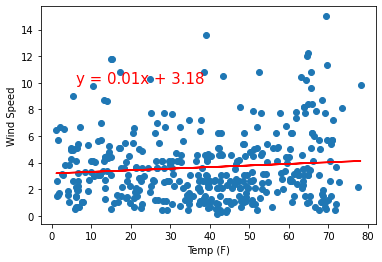

In [45]:
weather_dry_south = weather_dry[weather_dry.Lat >= 0]
x_values = weather_dry_south['Lat']
y_values = weather_dry_south['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print('The r-value is: '+str(rvalue))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temp (F)')
plt.ylabel('Wind Speed')
plt.show()